# Silhouette Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

SEED = 42

## Training Kmeans

In [3]:
def scatter_plot(X, y=None):
  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(figsize=(7, 4))
  
  if y is None: 
    ax.scatter(X[:, 0], X[:, 1], marker=".", s=10)
  else:
    ax.scatter(X[:, 0], X[:, 1], marker=".", s=10, c=y)

  ax.set_xlabel("$x_1$", fontsize=14)
  ax.set_ylabel("$x_2$", fontsize=14)
  ax.tick_params(axis='both', labelsize=8)

  ax.grid(False)
  plt.tight_layout()

  plt.savefig("scatter.png", dpi=600, transparent=True)

  plt.show()

In [4]:
def train_kmeans(X):
  ks = np.linspace(2, 8, 7, dtype=np.int64)
  inertias = []
  silhouettes = []
  kmeans_k = []
  for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
    kmeans_k.append(kmeans)

  return kmeans_k, inertias, silhouettes, ks

In [5]:
blob_centers = np.array(
    [[2.90, 6.50],
     [2.50, 2.50],
     [1.80, 5.50],
     [3.55, 3.50],
     [3.45, 4.30]]
)

blob_std = np.array([0.35, 0.2, 0.3, 0.1, 0.1])

In [6]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=blob_centers, 
                  cluster_std=blob_std, random_state=SEED)

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

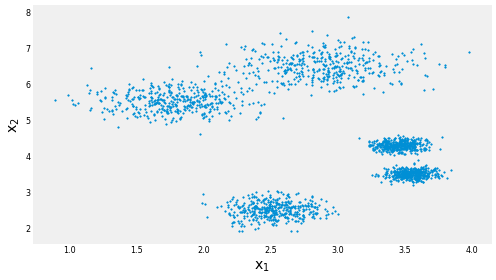

In [7]:
scatter_plot(X)

In [8]:
kmeans_k, inertias, silhouettes, ks = train_kmeans(X)

In [11]:
silhouettes

[0.6328133148678518,
 0.6716211668230646,
 0.6893052248264789,
 0.7095494270839509,
 0.6446690321659709,
 0.5867192343372842,
 0.588726115822248]

## Elbow method vs Silhouette scores

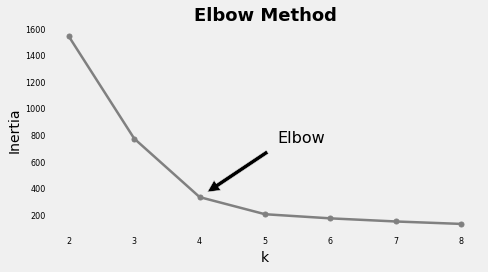

In [14]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks, inertias, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Inertia", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Elbow Method", fontsize=18, fontweight="bold")
ax.grid(False)

ax.annotate("Elbow",
            xy=(4, inertias[2]),
            xytext=(0.55, 0.45),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor="black", shrink=0.1)
            )

plt.tight_layout()
plt.savefig("elbow.png", dpi=600, transparent=True)
plt.show()

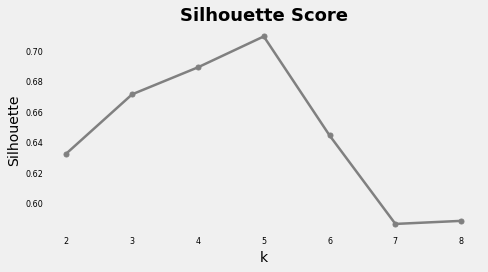

In [15]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(ks, silhouettes, "o-", color="grey", linewidth=2.5, markersize=5)

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Silhouette", fontsize=14)
ax.tick_params(axis='both', labelsize=8)

ax.set_title("Silhouette Score", fontsize=18, fontweight="bold")
ax.grid(False)

# ax.annotate("silhouette score = {:.2f}".format(silhouettes[3]),
#             xy=(5, silhouettes[3]),
#             xytext=(0.65, 0.8),
#             textcoords="figure fraction",
#             fontsize=12,
#             arrowprops=dict(facecolor="black", shrink=0.1)
#             )

plt.tight_layout()
plt.savefig("silhouette_score.png", dpi=600, transparent=True)
plt.show()

## Silhouette Diagram

### Complete diagram

For n_clusters = 3 The average silhouette_score is : 0.6716211668230646
For n_clusters = 4 The average silhouette_score is : 0.6893052248264789
For n_clusters = 5 The average silhouette_score is : 0.7095494270839509
For n_clusters = 6 The average silhouette_score is : 0.6532479727390482


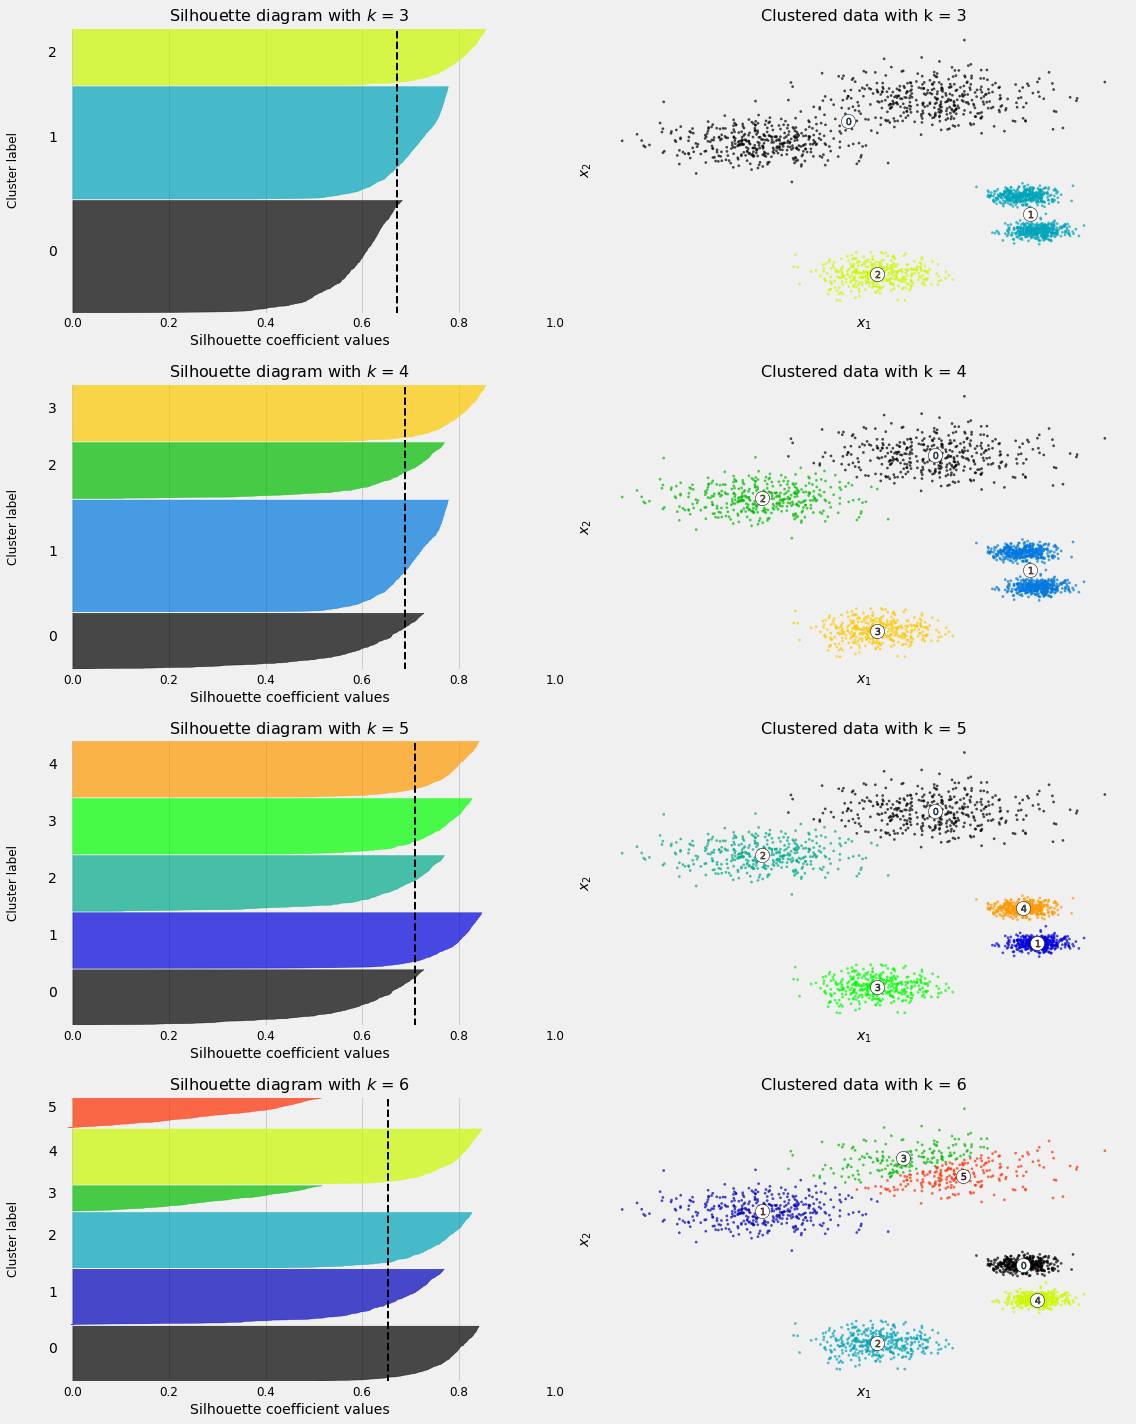

In [ ]:
range_n_clusters = [3, 4, 5, 6]

fig, ax = plt.subplots(4, 2, figsize=(16, 20))

# [0, 0] [0, 1] 
# [1, 0] [1, 1]
# [2, 0] [2, 1]
# [3, 0] [3, 1]

for row, n_clusters in enumerate(range_n_clusters):

  # Create a subplot with 1 row and 2 columns
  # fig, (ax1, ax2) = plt.subplots(1, 2)
  
  # fig.set_size_inches(12, 6)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax[row, 0].set_xlim([-0.1, 1])

  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax[row, 0].set_ylim([0, len(X) + (n_clusters + 1) * 10])

  # get predictions for each label
  cluster_labels = kmeans_k[n_clusters-2].predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
  
  # Compute the silhouette score for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax[row, 0].fill_betweenx(np.arange(y_lower, y_upper),
                           0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax[row, 0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax[row, 0].set_title("Silhouette diagram with $k$ = {}".format(n_clusters), fontsize=16)
  ax[row, 0].set_xlabel("Silhouette coefficient values", fontsize=14)
  ax[row, 0].set_ylabel("Cluster label", fontsize=12)
  
  ax[row, 0].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
  ax[row, 0].tick_params(axis='both', which='major', labelsize=12)

  # The vertical line for average silhouette score of all the values
  ax[row, 0].axvline(x=silhouette_avg, color="black", linestyle="--", linewidth=2)

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax[row, 1].scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                     c=colors, edgecolor='k')
  
  # Labeling the clusters
  centers = kmeans_k[n_clusters-2].cluster_centers_
  # Draw white circles at cluster centers
  ax[row, 1].scatter(centers[:, 0], centers[:, 1], marker='o',
                     c="white", alpha=1, s=200, edgecolor='k')
  
  for i, c in enumerate(centers):
    ax[row, 1].scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                       s=50, edgecolor='k')

  ax[row, 1].set_title(f"Clustered data with k = {n_clusters}", fontsize=16)
  ax[row, 1].set_xlabel("$x_1$", fontsize=14)
  ax[row, 1].set_ylabel("$x_2$", fontsize=14)
  ax[row, 1].set_yticks([])  # Clear the yaxis labels / ticks
  ax[row, 1].set_xticks([])

  ax[row, 1].grid(False)

  # fig.suptitle(("Silhouette analysis for KMeans clustering "
  # "with $k$ = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("silhouette_diagram.png", dpi=650, transparent=False)
plt.show()

### Simplified Diagram

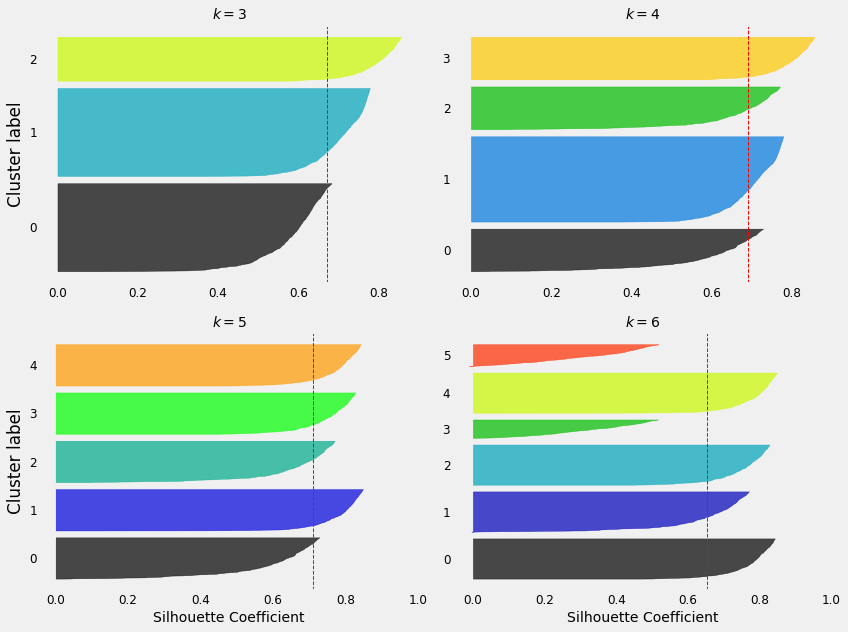

In [ ]:
plt.figure(figsize=(12, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.nipy_spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster label")
    
    if k in (5, 6):
      plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient", fontsize=14)
    # else:
    #     plt.tick_params(labelbottom=False)
    plt.tick_params(labelsize=12)
    plt.axvline(x=silhouettes[k - 2], color="red", linestyle="--", linewidth=1)
    plt.title("$k={}$".format(k), fontsize=14, fontweight="bold")

    plt.grid(False)

plt.tight_layout()
plt.show()

## KMeans decision boundaries

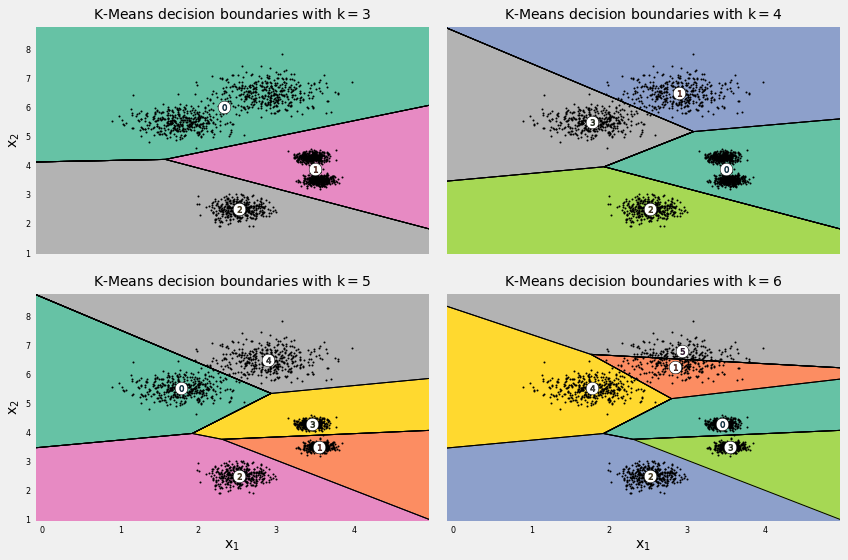

In [16]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# [0, 0] [0, 1]
# [1, 0] [1, 1]

for i, j, k in zip([0, 0, 1, 1], [0, 1, 0, 1], [3, 4, 5, 6]):
  
  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans_k[k-2].predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  ax[i, j].contourf(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap="Set2")
  ax[i, j].contour(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              linewidths=1, colors='k')

  ax[i, j].plot(X[:, 0], X[:, 1], 'k.', markersize=2)

  centers = kmeans_k[k-2].cluster_centers_
  ax[i, j].scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=160, edgecolor='k', zorder=5)
  for cluster_idx, c in enumerate(centers):
    ax[i, j].scatter(c[0], c[1], marker='$%d$' % cluster_idx, alpha=1,
                    s=40, edgecolor='k', zorder=10)

  ax[i, j].set_title("K-Means decision boundaries with $k = {}$".format(k), 
                    fontsize=14, fontweight="bold")

  if k % 2 == 1:
    ax[i, j].set_ylabel("$x_2$", fontsize=14)

  if k >= 5:
    ax[i, j].set_xlabel("$x_1$", fontsize=14)
  
  ax[i, j].tick_params(axis='both', labelsize=8)

  ax[i, j].grid(False)

plt.tight_layout()
plt.savefig("decision_boundaries.png", dpi=800, transparent=True)
plt.show()